Sparsity of the training dataset: 98.69%
Sparsity of the test dataset: 99.62%


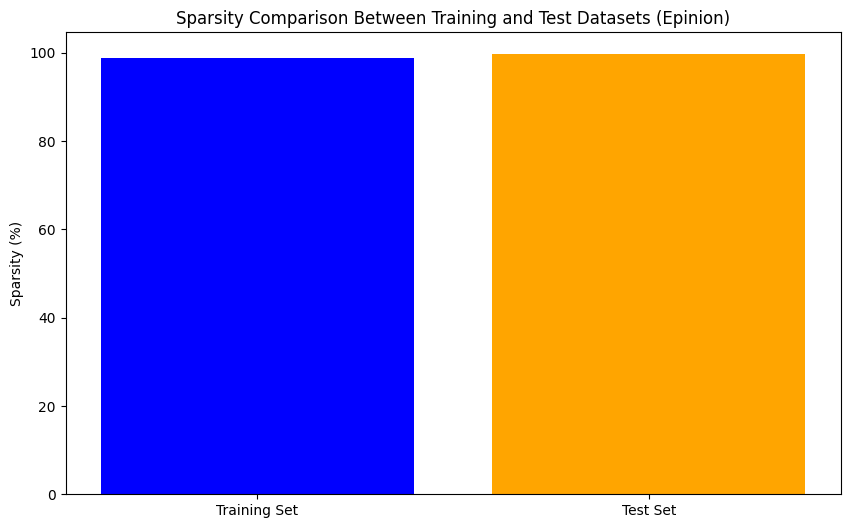

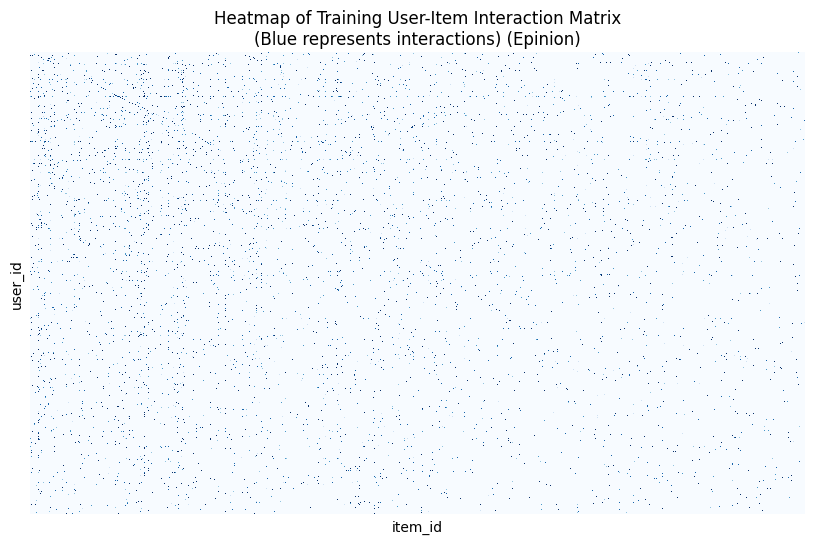

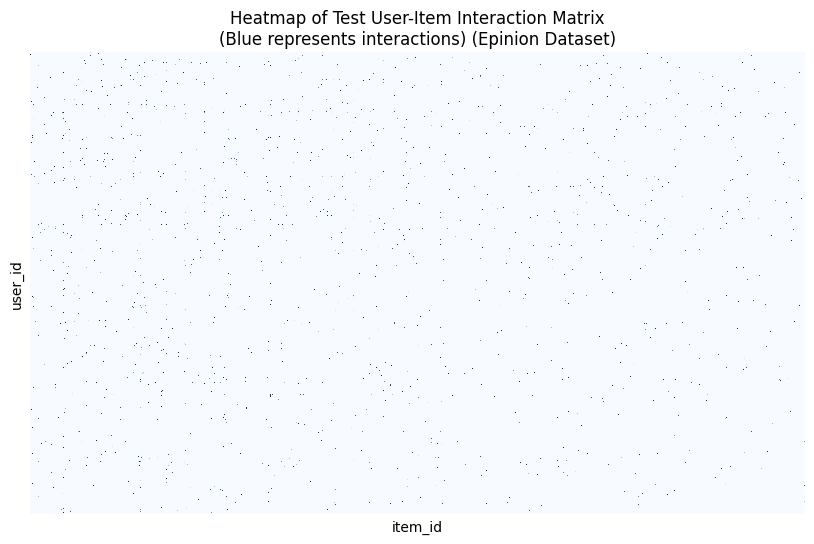

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

train_file_path = '/content/Epinion_train.txt'
test_file_path = '/content/Epinion_test.txt'

train_df = pd.read_csv(train_file_path, sep="\t", header=None, names=["user_id", "item_id", "interaction_value"])
test_df = pd.read_csv(test_file_path, sep="\t", header=None, names=["user_id", "item_id", "interaction_value"])

train_user_item_matrix = train_df.pivot_table(index='user_id', columns='item_id', values='interaction_value', fill_value=0)
test_user_item_matrix = test_df.pivot_table(index='user_id', columns='item_id', values='interaction_value', fill_value=0)

train_sparse_matrix = csr_matrix(train_user_item_matrix.values)
test_sparse_matrix = csr_matrix(test_user_item_matrix.values)

train_non_zero_elements = train_sparse_matrix.nnz
test_non_zero_elements = test_sparse_matrix.nnz
total_train_elements = train_sparse_matrix.shape[0] * train_sparse_matrix.shape[1]
total_test_elements = test_sparse_matrix.shape[0] * test_sparse_matrix.shape[1]

train_sparsity = 1 - (train_non_zero_elements / total_train_elements)
test_sparsity = 1 - (test_non_zero_elements / total_test_elements)

print(f"Sparsity of the training dataset: {train_sparsity * 100:.2f}%")
print(f"Sparsity of the test dataset: {test_sparsity * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.bar(['Training Set', 'Test Set'], [train_sparsity * 100, test_sparsity * 100], color=['blue', 'orange'])
plt.ylabel('Sparsity (%)')
plt.title('Sparsity Comparison Between Training and Test Datasets (Epinion)')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(train_user_item_matrix, cmap="Blues", cbar=False, xticklabels=False, yticklabels=False)
plt.title("Heatmap of Training User-Item Interaction Matrix\n(Blue represents interactions) (Epinion)")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(test_user_item_matrix, cmap="Blues", cbar=False, xticklabels=False, yticklabels=False)
plt.title("Heatmap of Test User-Item Interaction Matrix\n(Blue represents interactions) (Epinion Dataset)")
plt.show()


Sparsity of the training dataset: 98.69%
Sparsity of the test dataset: 99.62%


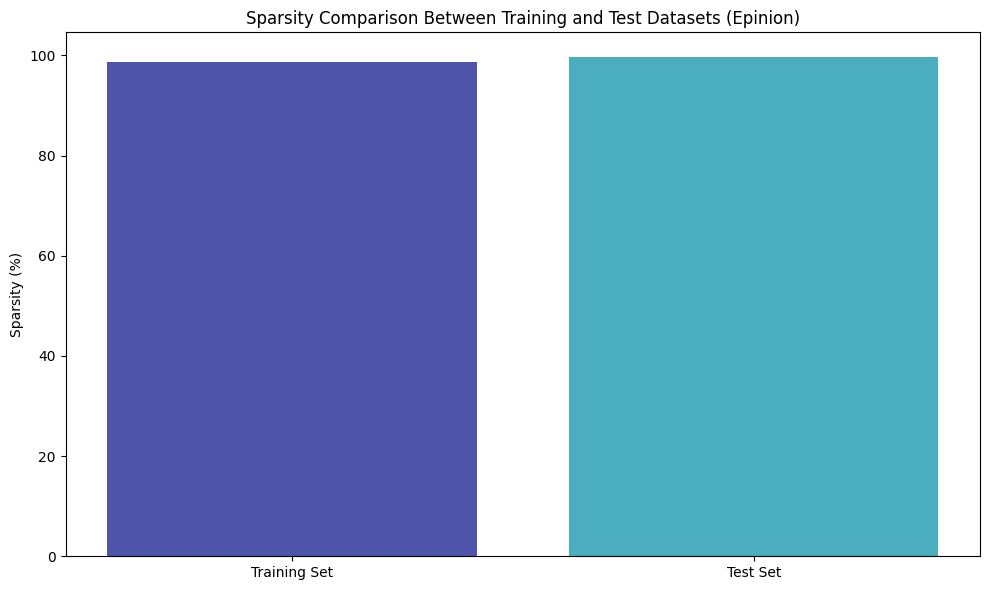

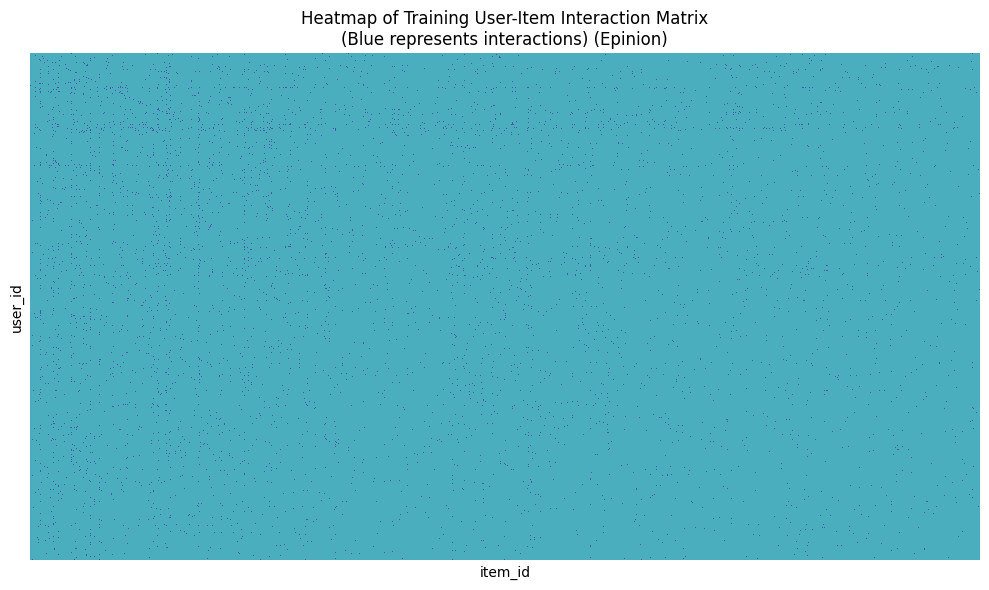

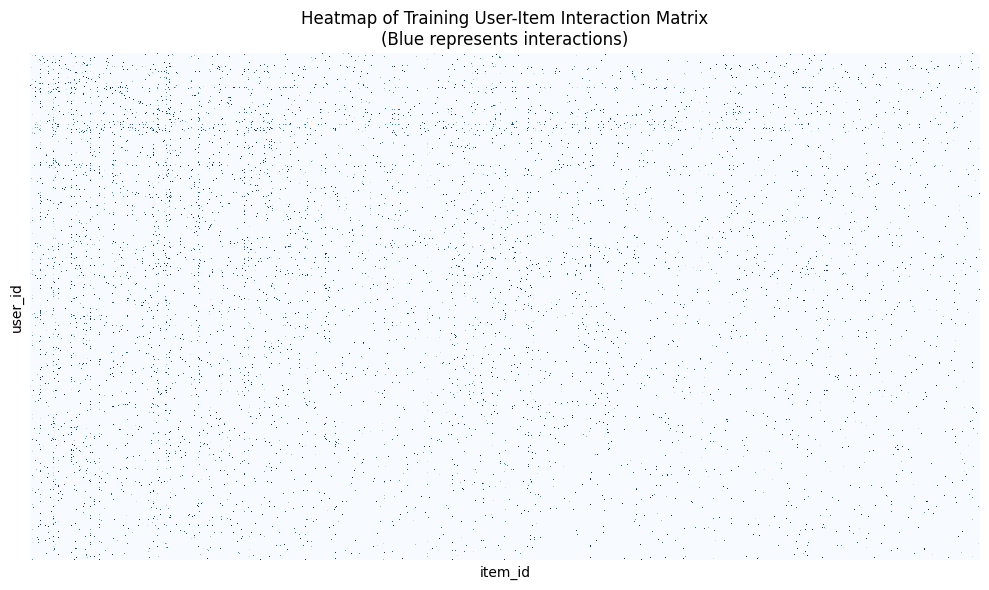

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix


colors = {
    "teal": "#4aaebf",
    "blue": "#4f55ab",
    "orange": "#e87d21",
}


def set_transparent_background(fig, ax):
    fig.patch.set_alpha(0)  # Transparent figure background
    ax.patch.set_alpha(0)   # Transparent axes background


train_file_path = '/content/Epinion_train.txt'
test_file_path = '/content/Epinion_test.txt'


train_df = pd.read_csv(train_file_path, sep="\t", header=None, names=["user_id", "item_id", "interaction_value"])
test_df = pd.read_csv(test_file_path, sep="\t", header=None, names=["user_id", "item_id", "interaction_value"])


train_user_item_matrix = train_df.pivot_table(index='user_id', columns='item_id', values='interaction_value', fill_value=0)
test_user_item_matrix = test_df.pivot_table(index='user_id', columns='item_id', values='interaction_value', fill_value=0)


train_sparse_matrix = csr_matrix(train_user_item_matrix.values)
test_sparse_matrix = csr_matrix(test_user_item_matrix.values)


train_non_zero_elements = train_sparse_matrix.nnz
test_non_zero_elements = test_sparse_matrix.nnz
total_train_elements = train_sparse_matrix.shape[0] * train_sparse_matrix.shape[1]
total_test_elements = test_sparse_matrix.shape[0] * test_sparse_matrix.shape[1]

train_sparsity = 1 - (train_non_zero_elements / total_train_elements)
test_sparsity = 1 - (test_non_zero_elements / total_test_elements)


print(f"Sparsity of the training dataset: {train_sparsity * 100:.2f}%")
print(f"Sparsity of the test dataset: {test_sparsity * 100:.2f}%")


fig, ax = plt.subplots(figsize=(10, 6))


ax.bar(
    ['Training Set', 'Test Set'],
    [train_sparsity * 100, test_sparsity * 100],
    color=[colors["blue"], colors["teal"]]
)
ax.set_ylabel('Sparsity (%)')
ax.set_title('Sparsity Comparison Between Training and Test Datasets (Epinion)')

set_transparent_background(fig, ax)  # Apply transparency
plt.tight_layout()
plt.savefig("sparsity_comparison_bar_chart.png", transparent=True)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(
    train_user_item_matrix,
    cmap=sns.color_palette([colors["teal"], colors["blue"]], as_cmap=True),
    cbar=False,
    xticklabels=False,
    yticklabels=False,
    ax=ax
)
ax.set_title("Heatmap of Training User-Item Interaction Matrix\n(Blue represents interactions) (Epinion)")

set_transparent_background(fig, ax)  # Apply transparency
plt.tight_layout()
plt.savefig("training_matrix_heatmap.png", transparent=True)
plt.show()



fig, ax = plt.subplots(figsize=(10, 6))


sns.heatmap(
    train_user_item_matrix,
    cmap="Blues",
    cbar=False,
    xticklabels=False,
    yticklabels=False,
    ax=ax
)


ax.set_title("Heatmap of Training User-Item Interaction Matrix\n(Blue represents interactions)")

fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

plt.tight_layout()
plt.savefig("heatmap_training_matrix.png", transparent=True)
plt.show()


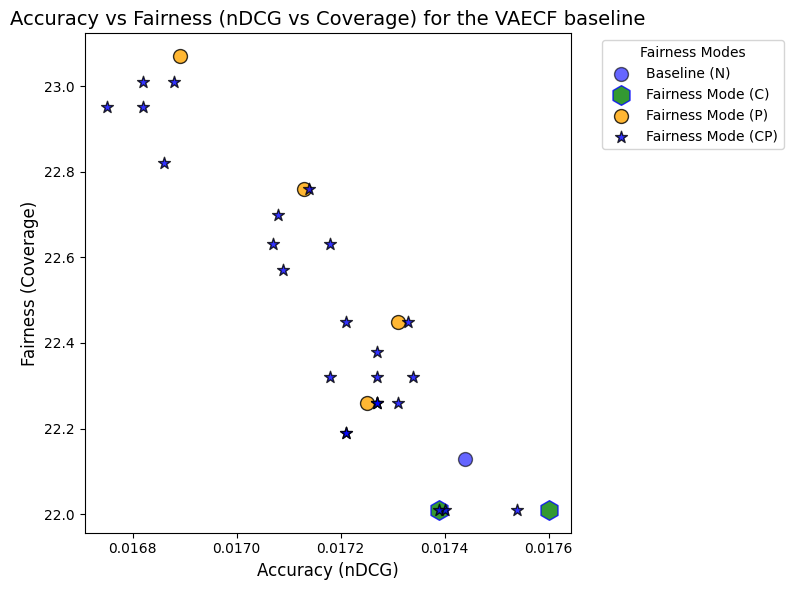

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'results_AmazonOffice_VAECF_new.csv'
df = pd.read_csv(file_path)

accuracy_column = 'ndcg_ALL'
fairness_columns = ['Cov_ALL', 'Cov_ACT', 'Cov_INACT']

fairness_modes = ['N', 'C', 'P', 'CP']

colors = {
    'N': 'blue',
    'C': 'green',
    'P': 'orange',
    'CP': 'blue'
}

fig, ax = plt.subplots(figsize=(8, 6))

for mode in fairness_modes:
    subset = df[df['Type'] == mode]

    if mode == 'N':
        ax.scatter(subset[accuracy_column], subset['Cov_ALL'],
                   label=f'Baseline ({mode})', color=colors[mode], marker='o',
                   s=100, edgecolors='black', alpha=0.6)
    elif mode == 'C':
        ax.scatter(subset[accuracy_column], subset['Cov_ALL'],
                   label=f'Fairness Mode ({mode})', color=colors[mode], marker='h',
                   s=200, edgecolors='blue', alpha=0.8)
    elif mode == 'P':
        ax.scatter(subset[accuracy_column], subset['Cov_ALL'],
                   label=f'Fairness Mode ({mode})', color=colors[mode], marker='o',
                   s=100, edgecolors='black', alpha=0.8)
    elif mode == 'CP':
        ax.scatter(subset[accuracy_column], subset['Cov_ALL'],
                   label=f'Fairness Mode ({mode})', color=colors[mode], marker='*',
                   s=80, edgecolors='black', alpha=0.8)

ax.set_title('Accuracy vs Fairness (nDCG vs Coverage) for the VAECF baseline', fontsize=14)
ax.set_xlabel('Accuracy (nDCG)', fontsize=12)
ax.set_ylabel('Fairness (Coverage)', fontsize=12)
ax.legend(title='Fairness Modes', bbox_to_anchor=(1.05, 1), loc='upper left')

fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

plt.tight_layout()
plt.savefig("accuracy_vs_fairness_vae_new.png", transparent=True)
plt.show()


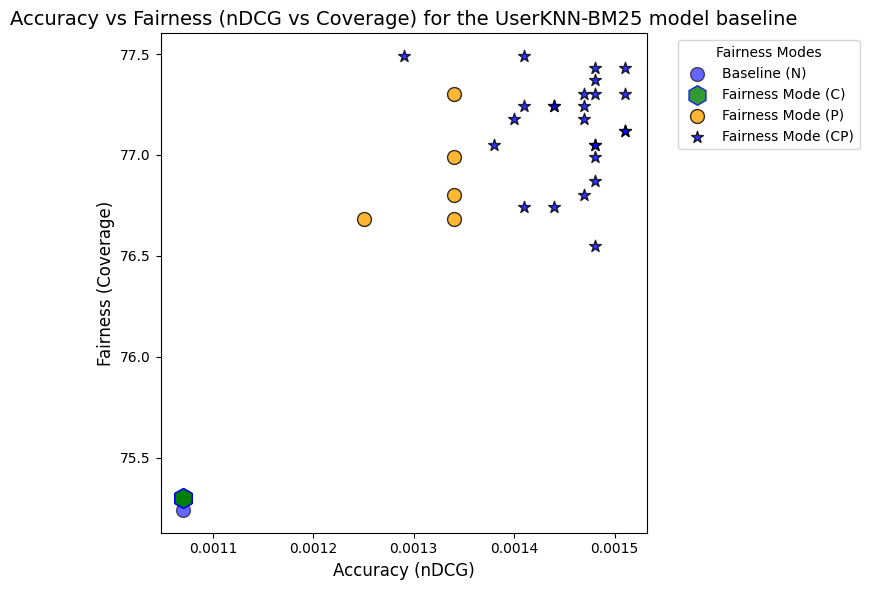

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'results_AmazonOffice_UserKNN-BM25.csv'
df = pd.read_csv(file_path)

accuracy_column = 'ndcg_ALL'
fairness_columns = ['Cov_ALL', 'Cov_ACT', 'Cov_INACT']

fairness_modes = ['N', 'C', 'P', 'CP']

colors = {
    'N': 'blue',
    'C': 'green',
    'P': 'orange',
    'CP': 'blue'
}

fig, ax = plt.subplots(figsize=(8, 6))

for mode in fairness_modes:
    subset = df[df['Type'] == mode]

    if mode == 'N':
        ax.scatter(subset[accuracy_column], subset['Cov_ALL'],
                   label=f'Baseline ({mode})', color=colors[mode], marker='o',
                   s=100, edgecolors='black', alpha=0.6)
    elif mode == 'C':
        ax.scatter(subset[accuracy_column], subset['Cov_ALL'],
                   label=f'Fairness Mode ({mode})', color=colors[mode], marker='h',
                   s=200, edgecolors='blue', alpha=0.8)
    elif mode == 'P':
        ax.scatter(subset[accuracy_column], subset['Cov_ALL'],
                   label=f'Fairness Mode ({mode})', color=colors[mode], marker='o',
                   s=100, edgecolors='black', alpha=0.8)
    elif mode == 'CP':
        ax.scatter(subset[accuracy_column], subset['Cov_ALL'],
                   label=f'Fairness Mode ({mode})', color=colors[mode], marker='*',
                   s=80, edgecolors='black', alpha=0.8)

ax.set_title('Accuracy vs Fairness (nDCG vs Coverage) for the UserKNN-BM25 model baseline', fontsize=14)
ax.set_xlabel('Accuracy (nDCG)', fontsize=12)
ax.set_ylabel('Fairness (Coverage)', fontsize=12)
ax.legend(title='Fairness Modes', bbox_to_anchor=(1.05, 1), loc='upper left')

fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

plt.tight_layout()
plt.savefig("accuracy_vs_fairness_userknn_bm25.png", transparent=True)

plt.show()


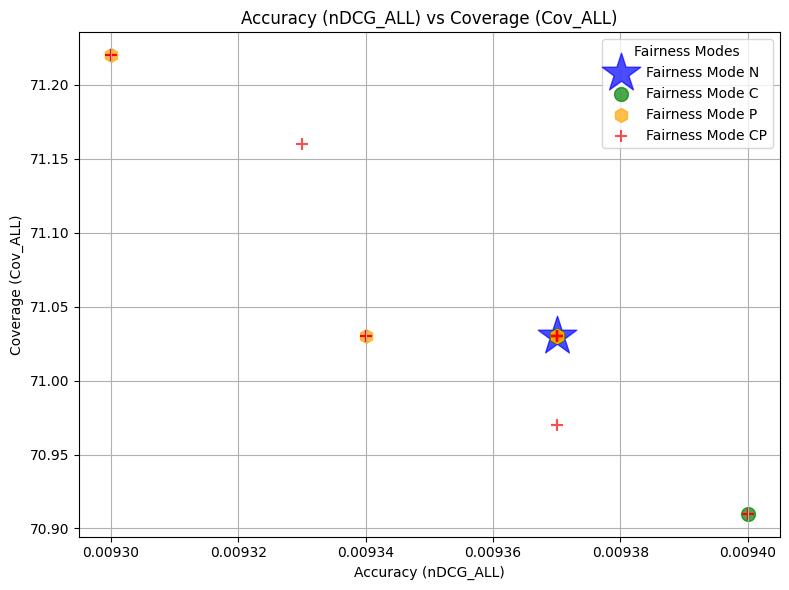

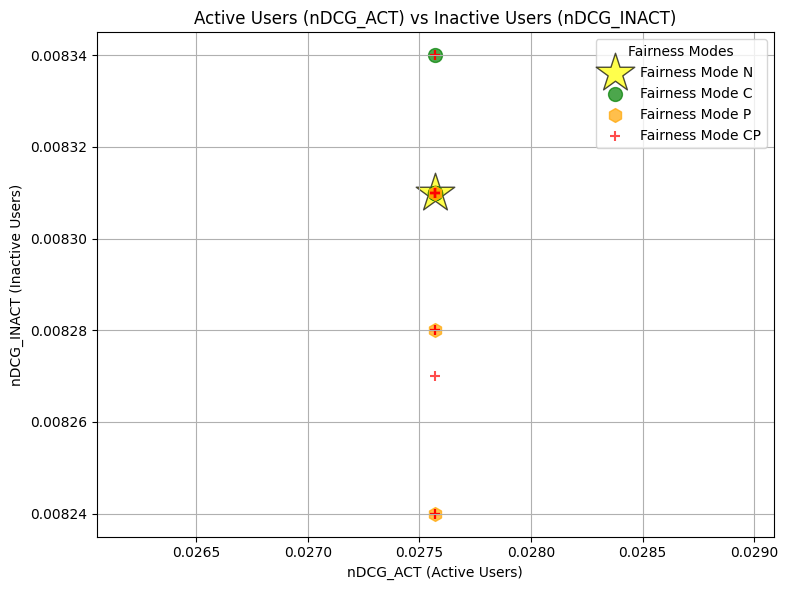

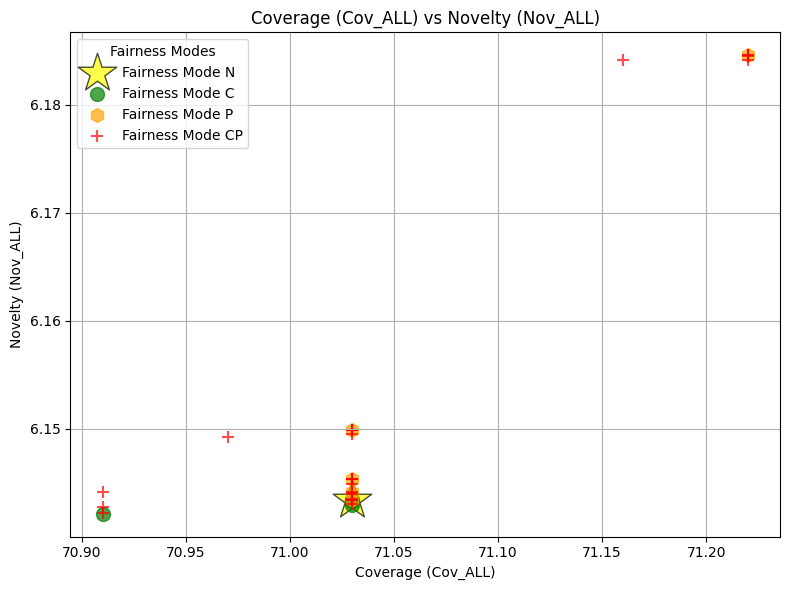

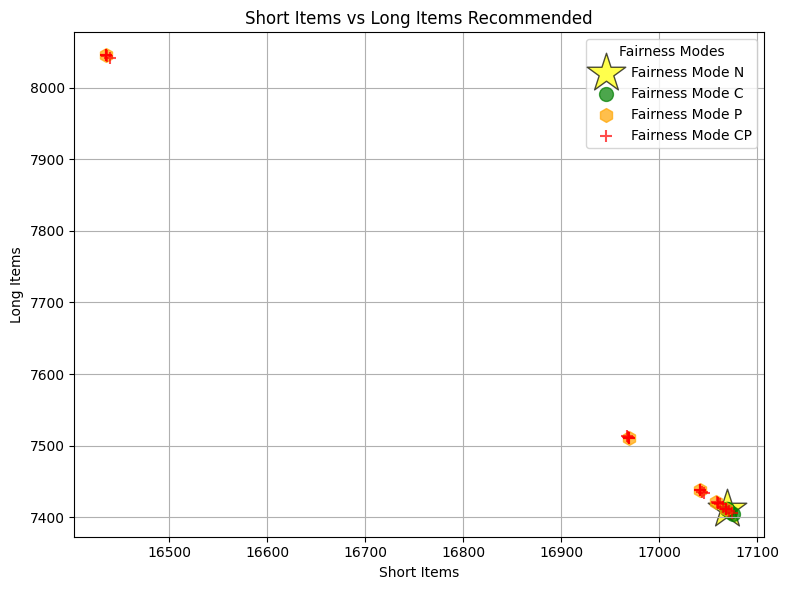

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
file_path = "results_AmazonOffice_PF.csv"
data = pd.read_csv(file_path, sep=",")

# Cleaning column names
data.columns = data.columns.str.replace(',', '').str.strip()

if 'Type' not in data.columns:
    print("Error: The column 'Type' does not exist. Please verify the column name.")
    print("Available columns:", data.columns)
else:
    # Data cleaning and formatting
    fairness_types = data['Type'].unique()

    # Function to plot Accuracy vs Coverage
    plt.figure(figsize=(8, 6))
    for fairness_type in fairness_types:
        subset = data[data['Type'] == fairness_type]

        # Different settings for 'N', 'C', 'P', and 'CP'
        if fairness_type == 'N':
            plt.scatter(subset['ndcg_ALL'], subset['Cov_ALL'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=850, marker='*', c='blue')
        elif fairness_type == 'C':
            plt.scatter(subset['ndcg_ALL'], subset['Cov_ALL'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=100, c='green')
        elif fairness_type == 'P':
            plt.scatter(subset['ndcg_ALL'], subset['Cov_ALL'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=100, marker='h', c='orange')
        elif fairness_type == 'CP':
            plt.scatter(subset['ndcg_ALL'], subset['Cov_ALL'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=80, c='red',marker='+')
        else:
            plt.scatter(subset['ndcg_ALL'], subset['Cov_ALL'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=80)

    plt.title('Accuracy (nDCG_ALL) vs Coverage (Cov_ALL)')
    plt.xlabel('Accuracy (nDCG_ALL)')
    plt.ylabel('Coverage (Cov_ALL)')
    plt.legend(title="Fairness Modes")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("accuracy_vs_coverage.png")
    plt.show()

    # Active vs Inactive User Comparison (nDCG)
    plt.figure(figsize=(8, 6))
    for fairness_type in fairness_types:
        subset = data[data['Type'] == fairness_type]

        # Different settings for 'N', 'C', 'P', and 'CP'
        if fairness_type == 'N':
            plt.scatter(subset['ndcg_ACT'], subset['ndcg_INACT'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=850, marker='*', c='yellow',edgecolors='black')
        elif fairness_type == 'C':
            plt.scatter(subset['ndcg_ACT'], subset['ndcg_INACT'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=100, c='green')
        elif fairness_type == 'P':
            plt.scatter(subset['ndcg_ACT'], subset['ndcg_INACT'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=100, marker='h', c='orange')
        elif fairness_type == 'CP':
            plt.scatter(subset['ndcg_ACT'], subset['ndcg_INACT'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=60, marker='+', c='red')
        else:
            plt.scatter(subset['ndcg_ACT'], subset['ndcg_INACT'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=80)

    plt.title('Active Users (nDCG_ACT) vs Inactive Users (nDCG_INACT)')
    plt.xlabel('nDCG_ACT (Active Users)')
    plt.ylabel('nDCG_INACT (Inactive Users)')
    plt.legend(title="Fairness Modes")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("active_vs_inactive_ndcg.png")
    plt.show()

    # Coverage vs Novelty
    plt.figure(figsize=(8, 6))
    for fairness_type in fairness_types:
        subset = data[data['Type'] == fairness_type]

        # Different settings for 'N', 'C', 'P', and 'CP'
        if fairness_type == 'N':
            plt.scatter(subset['Cov_ALL'], subset['Nov_ALL'], label=f'Fairness Mode {fairness_type}', alpha=0.7,s=850, marker='*', c='yellow',edgecolors='black')
        elif fairness_type == 'C':
            plt.scatter(subset['Cov_ALL'], subset['Nov_ALL'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=100, c='green')
        elif fairness_type == 'P':
            plt.scatter(subset['Cov_ALL'], subset['Nov_ALL'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=100, marker='h', c='orange')
        elif fairness_type == 'CP':
            plt.scatter(subset['Cov_ALL'], subset['Nov_ALL'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=80, c='red',marker='+')
        else:
            plt.scatter(subset['Cov_ALL'], subset['Nov_ALL'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=80)

    plt.title('Coverage (Cov_ALL) vs Novelty (Nov_ALL)')
    plt.xlabel('Coverage (Cov_ALL)')
    plt.ylabel('Novelty (Nov_ALL)')
    plt.legend(title="Fairness Modes")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("coverage_vs_novelty.png")
    plt.show()

    # Item Bias: Short vs Long Items
    plt.figure(figsize=(8, 6))
    for fairness_type in fairness_types:
        subset = data[data['Type'] == fairness_type]

        # Different settings for 'N', 'C', 'P', and 'CP'
        if fairness_type == 'N':
            plt.scatter(subset['Short_Items'], subset['Long_Items'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=850, marker='*', c='yellow',edgecolors='black')
        elif fairness_type == 'C':
            plt.scatter(subset['Short_Items'], subset['Long_Items'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=100, c='green')
        elif fairness_type == 'P':
            plt.scatter(subset['Short_Items'], subset['Long_Items'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=100, marker='h', c='orange')
        elif fairness_type == 'CP':
            plt.scatter(subset['Short_Items'], subset['Long_Items'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=80, c='red',marker='+')
        else:
            plt.scatter(subset['Short_Items'], subset['Long_Items'], label=f'Fairness Mode {fairness_type}', alpha=0.7, s=80)

    plt.title('Short Items vs Long Items Recommended')
    plt.xlabel('Short Items')
    plt.ylabel('Long Items')
    plt.legend(title="Fairness Modes")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("short_vs_long_items.png")
    plt.show()


Visualizations for the results
(the values in the graphs are hardcoded from the results given in the paper)


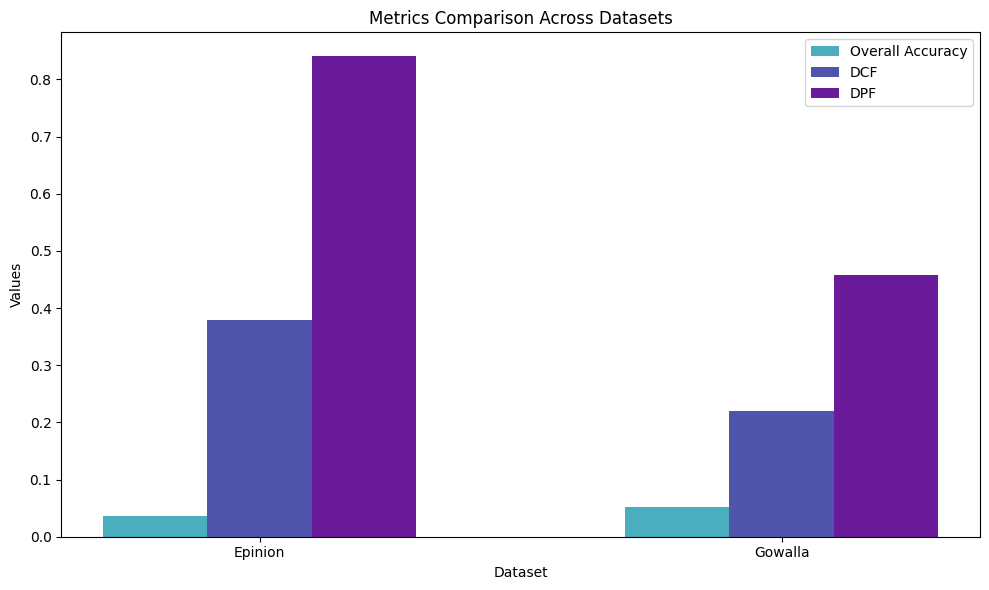

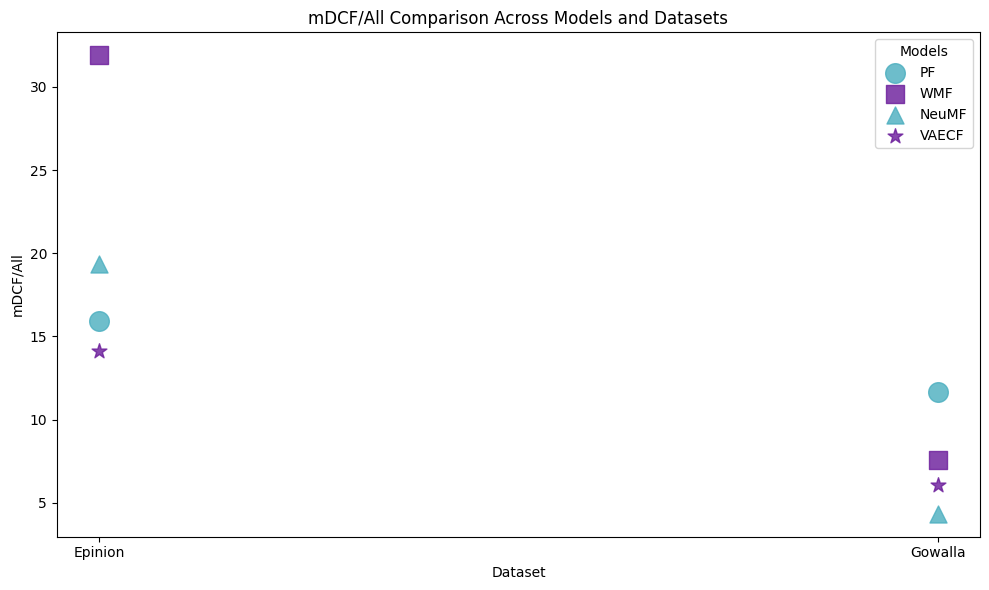

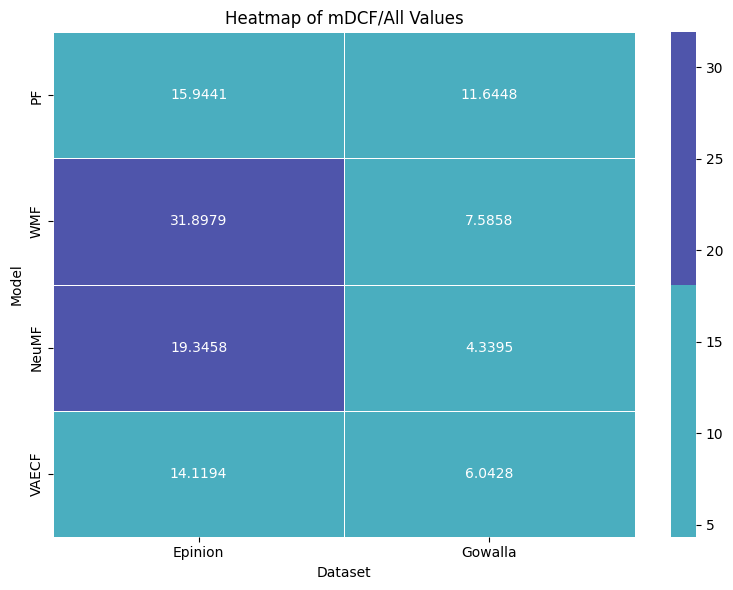

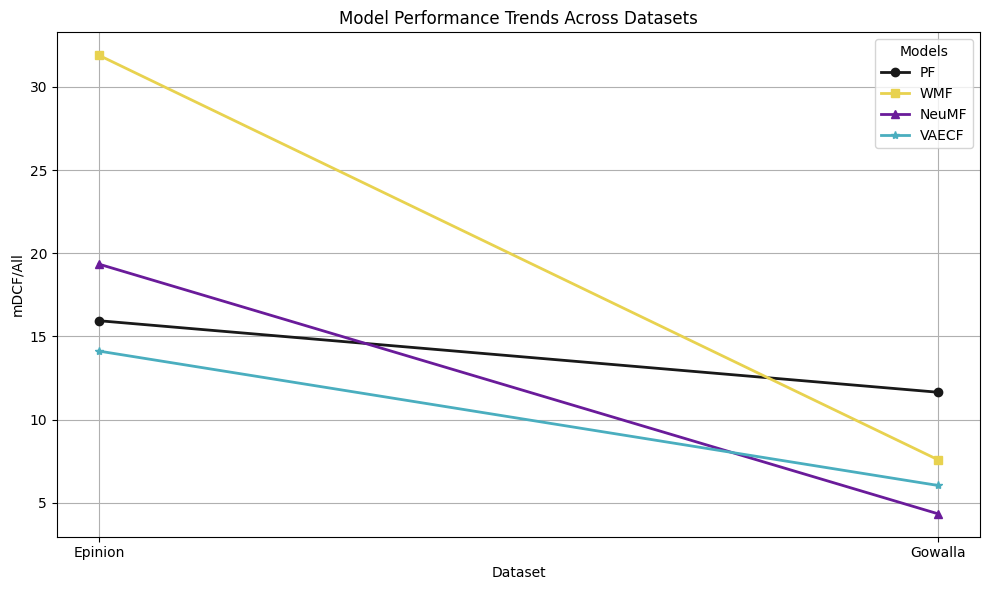

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set color palette
colors = {
    "teal": "#4aaebf",
    "blue": "#4f55ab",
    "black": "#191919",
    "purple": "#6a1b9a",
}

# Data
metrics = {
    "Dataset": ["Epinion", "Gowalla"],
    "Overall Accuracy": [0.0362, 0.0525],
    "DCF": [0.3797, 0.2205],
    "DPF": [0.8404, 0.4576]
}
mDCF_All = {
    "Model": ["PF", "WMF", "NeuMF", "VAECF"],
    "Epinion": [15.9441, 31.8979, 19.3458, 14.1194],
    "Gowalla": [11.6448, 7.5858, 4.3395, 6.0428]
}

# Convert data to DataFrames
metrics_df = pd.DataFrame(metrics)
mDCF_All_df = pd.DataFrame(mDCF_All)

# Function to set transparent background
def set_transparent_background(fig, ax):
    fig.patch.set_alpha(0)  # Transparent figure background
    ax.patch.set_alpha(0)   # Transparent axes background

# ----------------- Bar Chart for Accuracy, DCF, and DPF -----------------
x = np.arange(len(metrics_df["Dataset"]))
width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width, metrics_df["Overall Accuracy"], width, label="Overall Accuracy", color=colors["teal"])
ax.bar(x, metrics_df["DCF"], width, label="DCF", color=colors["blue"])
ax.bar(x + width, metrics_df["DPF"], width, label="DPF", color=colors["purple"])

ax.set_xlabel("Dataset")
ax.set_ylabel("Values")
ax.set_title("Metrics Comparison Across Datasets")
ax.set_xticks(x)
ax.set_xticklabels(metrics_df["Dataset"])
ax.legend()

set_transparent_background(fig, ax)  # Apply transparency
plt.tight_layout()
plt.savefig("metrics_comparison_bar_chart.png", transparent=True)
plt.show()

# ----------------- Scatter Plot for mDCF/All Values -----------------
fig, ax = plt.subplots(figsize=(10, 6))
models = mDCF_All_df["Model"]
datasets = ["Epinion", "Gowalla"]
markers = ["o", "s", "^", "*"]
sizes = [200, 175, 150, 125]

for i, model in enumerate(models):
    ax.scatter(
        datasets,
        [mDCF_All_df["Epinion"][i], mDCF_All_df["Gowalla"][i]],
        label=model,
        marker=markers[i],
        s=sizes[i],
        alpha=0.8,
        color=colors["teal"] if i % 2 == 0 else colors["purple"]
    )

ax.set_xlabel("Dataset")
ax.set_ylabel("mDCF/All")
ax.set_title("mDCF/All Comparison Across Models and Datasets")
ax.legend(title="Models")

set_transparent_background(fig, ax)  # Apply transparency
plt.tight_layout()
plt.savefig("mDCF_all_scatter_plot.png", transparent=True)
plt.show()

# ----------------- Heatmap for Model-Dataset Performance -----------------
fig, ax = plt.subplots(figsize=(8, 6))
heatmap_data = mDCF_All_df.set_index("Model")[datasets]
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".4f",
    cmap=sns.color_palette([colors["teal"], colors["blue"]]),
    cbar=True,
    linewidths=0.5,
    ax=ax
)

ax.set_title("Heatmap of mDCF/All Values")
ax.set_xlabel("Dataset")
ax.set_ylabel("Model")

set_transparent_background(fig, ax)  # Apply transparency
plt.tight_layout()
plt.savefig("mDCF_all_heatmap.png", transparent=True)
plt.show()

# ----------------- Line Chart for Model Performance Trends -----------------
fig, ax = plt.subplots(figsize=(10, 6))

line_colors = [colors["black"], "#e8d24f", colors["purple"], colors["teal"]]
for i, model in enumerate(models):
    ax.plot(
        datasets,
        [mDCF_All_df["Epinion"][i], mDCF_All_df["Gowalla"][i]],
        marker=markers[i],
        label=model,
        linewidth=2,
        color=line_colors[i]
    )

ax.set_xlabel("Dataset")
ax.set_ylabel("mDCF/All")
ax.set_title("Model Performance Trends Across Datasets")
ax.legend(title="Models")
ax.grid(True)

set_transparent_background(fig, ax)  # Apply transparency
plt.tight_layout()
plt.savefig("mDCF_all_line_chart_updated_colors.png", transparent=True)
plt.show()


<ipython-input-10-a2b1cafec092>:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dcf_plot = sns.barplot(


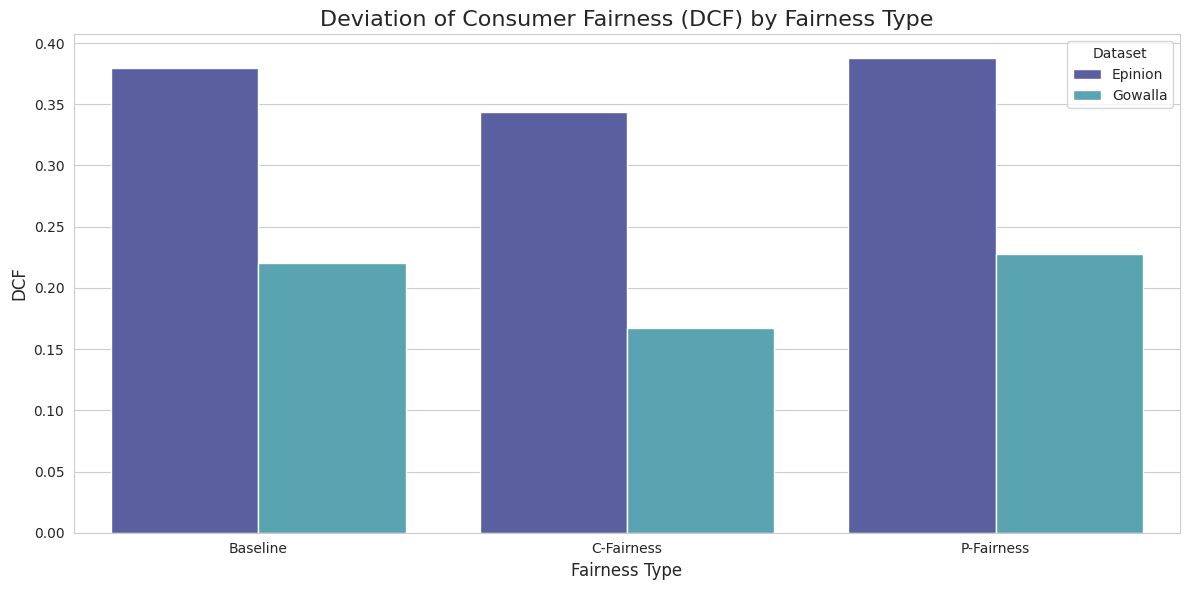

<ipython-input-10-a2b1cafec092>:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dpf_plot = sns.barplot(


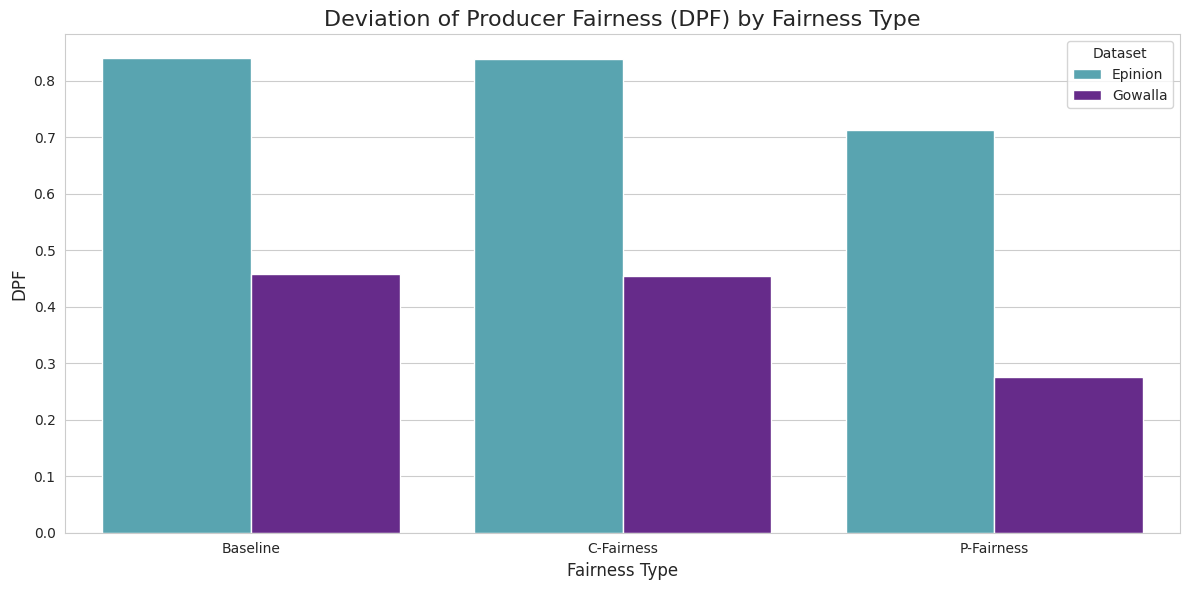

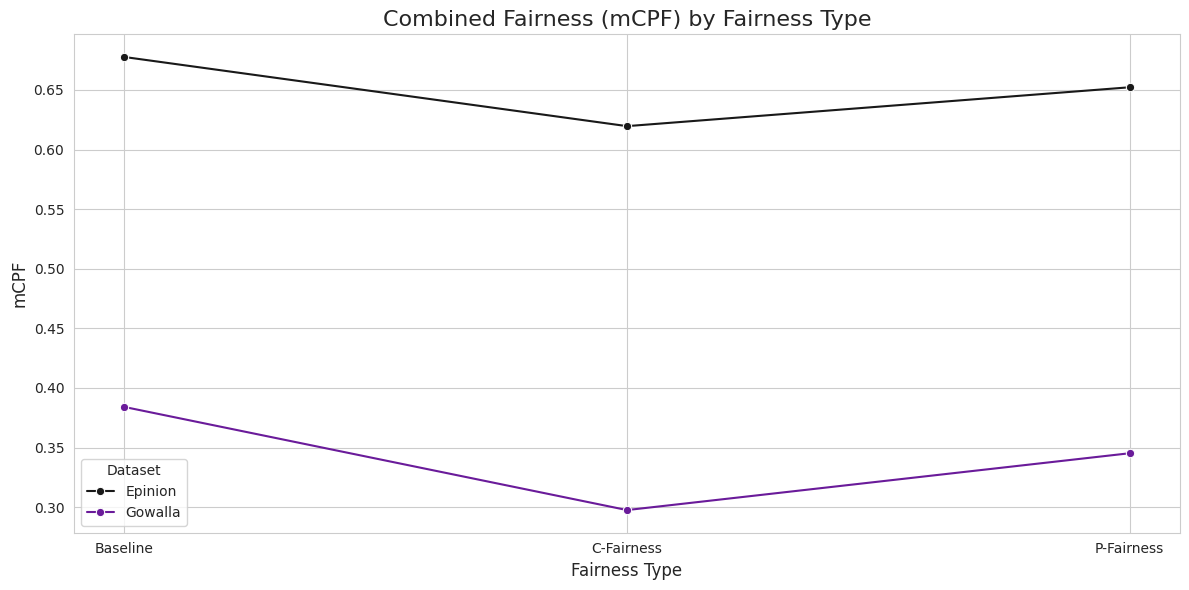

<ipython-input-10-a2b1cafec092>:75: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  tradeoff_plot = sns.scatterplot(


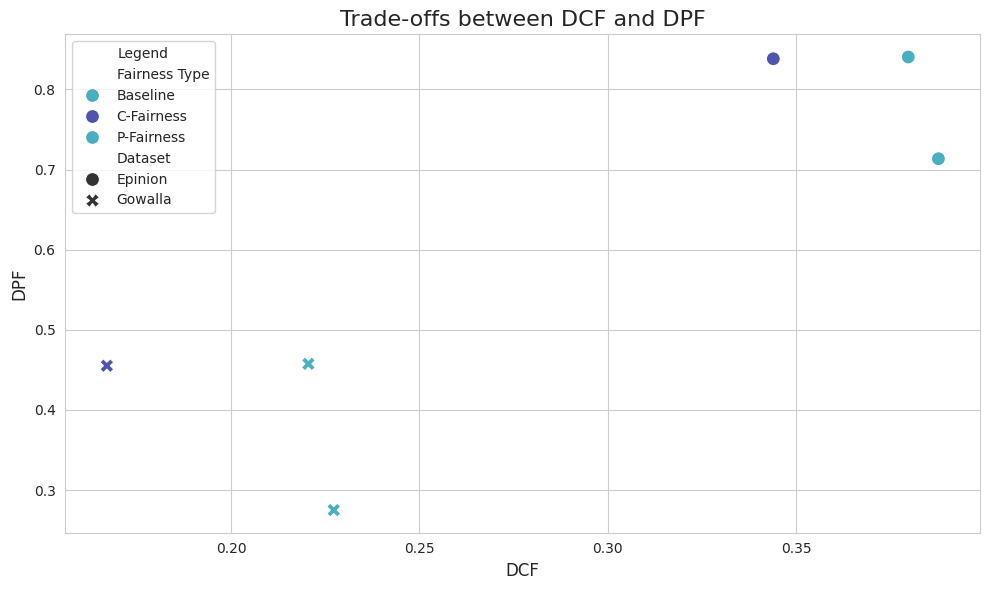

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set color palette
colors = {
    "teal": "#4aaebf",
    "blue": "#4f55ab",
    "black": "#191919",
    "purple": "#6a1b9a",
}


def set_transparent_background(fig, ax):
    fig.patch.set_alpha(0)  # Transparent figure background
    ax.patch.set_alpha(0)   # Transparent axes background

# Data Preparation (Sample Results from the Explanation)
data = {
    "Dataset": ["Epinion", "Epinion", "Epinion", "Gowalla", "Gowalla", "Gowalla"],
    "Fairness Type": ["Baseline", "C-Fairness", "P-Fairness", "Baseline", "C-Fairness", "P-Fairness"],
    "DCF": [0.3797, 0.3439, 0.3877, 0.22055, 0.16708, 0.22728],
    "DPF": [0.8404, 0.8382, 0.7135, 0.45760, 0.45525, 0.27515],
    "mCPF": [0.6776, 0.6196, 0.6522, 0.38408, 0.29758, 0.34525]
}

df = pd.DataFrame(data)

# Set the style for seaborn
sns.set_style("whitegrid")

# Plot 1: DCF and DPF Comparison by Fairness Type
plt.figure(figsize=(12, 6))
dcf_plot = sns.barplot(
    x="Fairness Type", y="DCF", hue="Dataset", data=df, palette=[colors["blue"], colors["teal"]], ci=None
)
dcf_plot.set_title("Deviation of Consumer Fairness (DCF) by Fairness Type", fontsize=16)
dcf_plot.set_ylabel("DCF", fontsize=12)
dcf_plot.set_xlabel("Fairness Type", fontsize=12)
plt.legend(title="Dataset", fontsize=10)
set_transparent_background(plt.gcf(), dcf_plot)
plt.tight_layout()
plt.savefig("dcf_plot.png", transparent=True)
plt.show()

plt.figure(figsize=(12, 6))
dpf_plot = sns.barplot(
    x="Fairness Type", y="DPF", hue="Dataset", data=df, palette=[colors["teal"], colors["purple"]], ci=None
)
dpf_plot.set_title("Deviation of Producer Fairness (DPF) by Fairness Type", fontsize=16)
dpf_plot.set_ylabel("DPF", fontsize=12)
dpf_plot.set_xlabel("Fairness Type", fontsize=12)
plt.legend(title="Dataset", fontsize=10)
set_transparent_background(plt.gcf(), dpf_plot)
plt.tight_layout()
plt.savefig("dpf_plot.png", transparent=True)
plt.show()

# Plot 2: Combined Fairness (mCPF) Line Plot
plt.figure(figsize=(12, 6))
mcpf_plot = sns.lineplot(
    x="Fairness Type", y="mCPF", hue="Dataset", data=df, marker="o", palette=[colors["black"], colors["purple"]]
)
mcpf_plot.set_title("Combined Fairness (mCPF) by Fairness Type", fontsize=16)
mcpf_plot.set_ylabel("mCPF", fontsize=12)
mcpf_plot.set_xlabel("Fairness Type", fontsize=12)
plt.legend(title="Dataset", fontsize=10)
set_transparent_background(plt.gcf(), mcpf_plot)
plt.tight_layout()
plt.savefig("mcpf_plot.png", transparent=True)
plt.show()

# Plot 3: Trade-offs between DCF and DPF
plt.figure(figsize=(10, 6))
tradeoff_plot = sns.scatterplot(
    x="DCF", y="DPF", hue="Fairness Type", style="Dataset", data=df, palette=[colors["teal"], colors["blue"]], s=100
)
tradeoff_plot.set_title("Trade-offs between DCF and DPF", fontsize=16)
tradeoff_plot.set_xlabel("DCF", fontsize=12)
tradeoff_plot.set_ylabel("DPF", fontsize=12)
plt.legend(title="Legend", fontsize=10)
set_transparent_background(plt.gcf(), tradeoff_plot)
plt.tight_layout()
plt.savefig("tradeoff_plot.png", transparent=True)
plt.show()


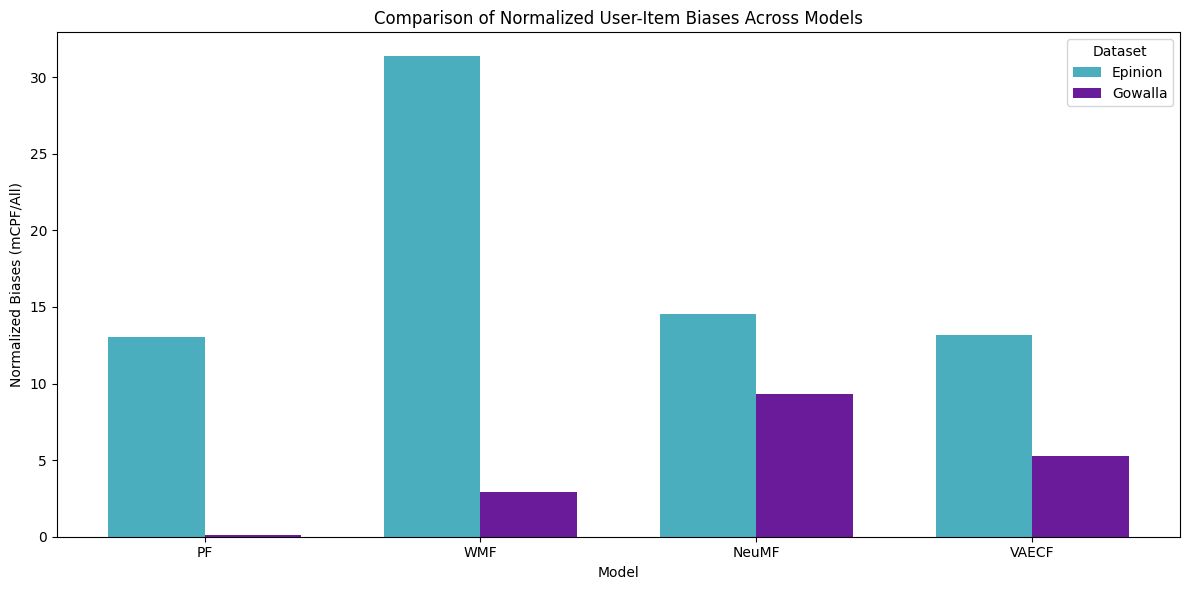

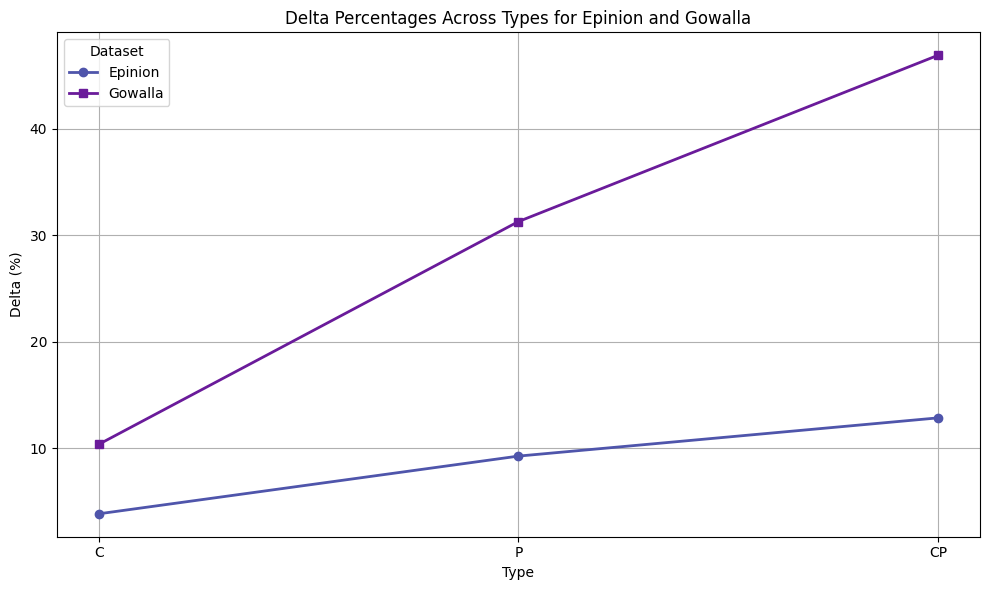

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set color palette
colors = {
    "teal": "#4aaebf",
    "blue": "#4f55ab",
    "black": "#191919",
    "purple": "#6a1b9a",
    "orange": "#e87d21",
}


def set_transparent_background(fig, ax):
    fig.patch.set_alpha(0)  # Transparent figure background
    ax.patch.set_alpha(0)   # Transparent axes background

# Data
metrics = {
    "Dataset": ["Epinion", "Gowalla"],
    "Overall Accuracy": [0.0362, 0.0525],
    "DCF": [0.3797, 0.2205],
    "DPF": [0.8404, 0.4576]
}
mDCF_All = {
    "Model": ["PF", "WMF", "NeuMF", "VAECF"],
    "Epinion": [15.9441, 31.8979, 19.3458, 14.1194],
    "Gowalla": [11.6448, 7.5858, 4.3395, 6.0428]
}
normalized_user_item_biases = {
    "Model": ["PF", "WMF", "NeuMF", "VAECF"],
    "Epinion": [13.0160, 31.3632, 14.5451, 13.1754],
    "Gowalla": [0.1343, 2.8952, 9.3087, 5.2617]
}
delta_percent = {
    "Type": ["C", "P", "CP"],
    "Epinion": [3.83, 9.25, 12.84],
    "Gowalla": [10.36, 31.28, 46.90]
}

# Convert data to DataFrames
metrics_df = pd.DataFrame(metrics)
mDCF_All_df = pd.DataFrame(mDCF_All)
normalized_biases_df = pd.DataFrame(normalized_user_item_biases)
delta_percent_df = pd.DataFrame(delta_percent)

# ----------------- Bar Chart for Normalized User-Item Biases -----------------
x = np.arange(len(normalized_biases_df["Model"]))
width = 0.35
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - width / 2, normalized_biases_df["Epinion"], width, label="Epinion", color=colors["teal"])
ax.bar(x + width / 2, normalized_biases_df["Gowalla"], width, label="Gowalla", color=colors["purple"])

ax.set_xlabel("Model")
ax.set_ylabel("Normalized Biases (mCPF/All)")
ax.set_title("Comparison of Normalized User-Item Biases Across Models")
ax.set_xticks(x)
ax.set_xticklabels(normalized_biases_df["Model"])
ax.legend(title="Dataset")

set_transparent_background(fig, ax)  # Apply transparency
plt.tight_layout()
plt.savefig("normalized_biases_bar_chart.png", transparent=True)
plt.show()

# ----------------- Line Chart for Delta Percentages -----------------
fig, ax = plt.subplots(figsize=(10, 6))

for col, color, marker in zip(["Epinion", "Gowalla"], [colors["blue"], colors["purple"]], ["o", "s"]):
    ax.plot(
        delta_percent_df["Type"],
        delta_percent_df[col],
        marker=marker,
        label=col,
        linewidth=2,
        color=color
    )

ax.set_xlabel("Type")
ax.set_ylabel("Delta (%)")
ax.set_title("Delta Percentages Across Types for Epinion and Gowalla")
ax.legend(title="Dataset")
ax.grid(True)

set_transparent_background(fig, ax)  # Apply transparency
plt.tight_layout()
plt.savefig("delta_percentages_line_chart.png", transparent=True)
plt.show()


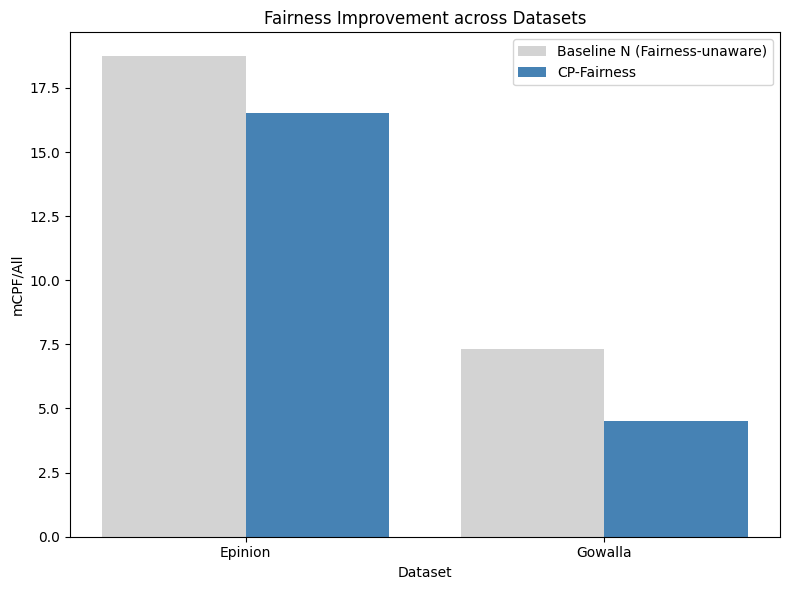

In [ ]:
import matplotlib.pyplot as plt

# Dataset data
datasets = ['Epinion', 'Gowalla']
baseline_values = [18.73, 7.31]
cp_fairness_values = [16.53, 4.51]

# Creating Bar Chart
x = range(len(datasets))

fig, ax = plt.subplots(figsize=(8, 6))

# Baseline bar
ax.bar(x, baseline_values, width=0.4, label='Baseline N (Fairness-unaware)', color='lightgray')

# CP-Fairness bar
ax.bar([i + 0.4 for i in x], cp_fairness_values, width=0.4, label='CP-Fairness', color='steelblue')

# Adding labels, title, and legend
ax.set_xlabel('Dataset')
ax.set_ylabel('mCPF/All')
ax.set_title('Fairness Improvement across Datasets')
ax.set_xticks([i + 0.2 for i in x])  # Adjust x-tick positions
ax.set_xticklabels(datasets)
set_transparent_background(fig, ax)  # Apply transparency
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


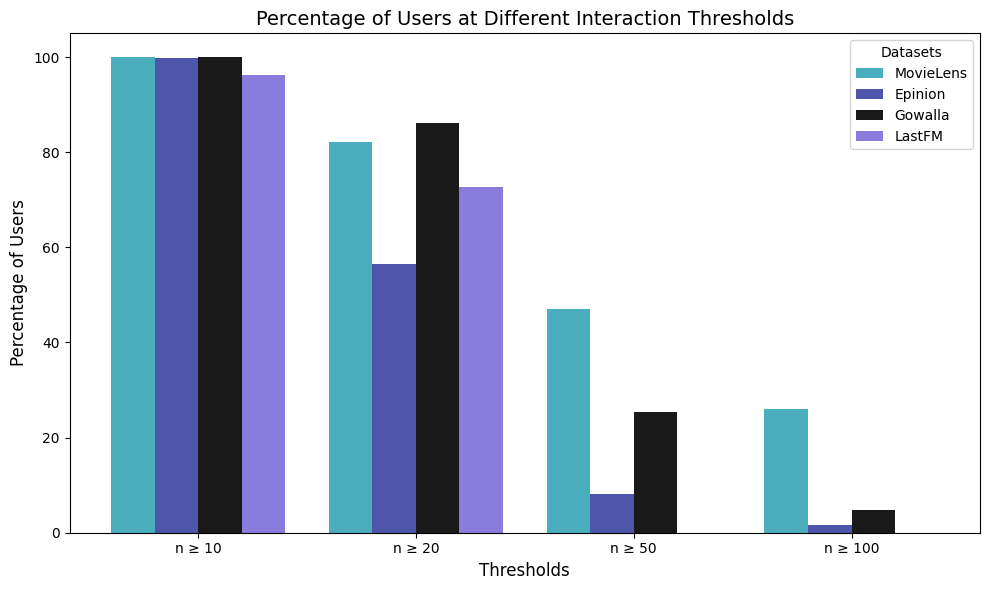

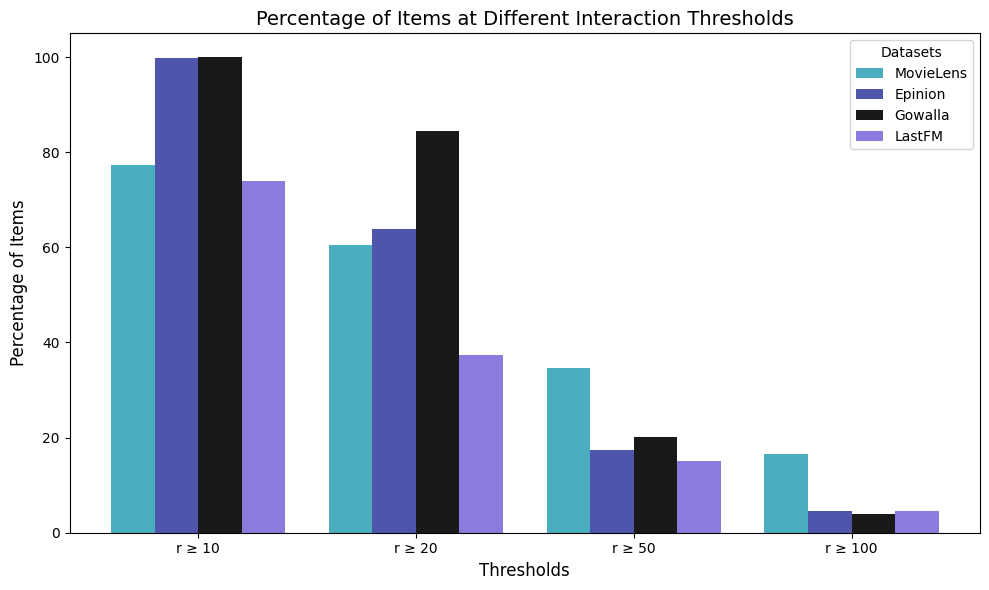

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ["MovieLens", "Epinion", "Gowalla", "LastFM"]
user_thresholds = ["n ≥ 10", "n ≥ 20", "n ≥ 50", "n ≥ 100"]
item_thresholds = ["r ≥ 10", "r ≥ 20", "r ≥ 50", "r ≥ 100"]

user_data = {
    "MovieLens": [100, 82.08, 46.98, 26.09],
    "Epinion": [99.85, 56.60, 8.11, 1.57],
    "Gowalla": [100, 86.11, 25.40, 4.87],
    "LastFM": [96.33, 72.73, 0.00, 0.00]
}

item_data = {
    "MovieLens": [77.39, 60.49, 34.54, 16.46],
    "Epinion": [99.81, 63.83, 17.33, 4.61],
    "Gowalla": [100, 84.44, 20.10, 3.95],
    "LastFM": [73.99, 37.36, 15.00, 4.48]
}

# Updated color palette with lighter blue and purple
colors = ["#4aaebf", "#4f55ab", "#191919", "#8a7cdd"]

# Function to create bar plots
def plot_data(data, thresholds, title, ylabel):
    x = np.arange(len(thresholds))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, dataset in enumerate(datasets):
        ax.bar(x + i * width, data[dataset], width, label=dataset, color=colors[i % len(colors)])

    ax.set_xlabel('Thresholds', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.set_xticks(x + width * (len(datasets) - 1) / 2)
    ax.set_xticklabels(thresholds, fontsize=10)
    ax.legend(title="Datasets", fontsize=10)

    # Set transparent background
    fig.patch.set_alpha(0)
    ax.patch.set_alpha(0)

    plt.tight_layout()
    plt.show()

# Plotting user thresholds
title_users = "Percentage of Users at Different Interaction Thresholds"
plot_data(user_data, user_thresholds, title_users, "Percentage of Users")

# Plotting item thresholds
title_items = "Percentage of Items at Different Interaction Thresholds"
plot_data(item_data, item_thresholds, title_items, "Percentage of Items")
